Emission data collected with HP 86140A & LeCroy Wavepro960

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import glob

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [2]:
# interative visualiser for the data-set, only works while using jupypter notebook

path = 'data-sets/data-set-5'
ds5_files = sorted(glob.glob(path+ '/*.txt'))
ds5_mA = np.array([0.0,0.1,0.2,0.25,0.3,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.8])

def ds5_visualiser(x):
    data_frame = pd.read_csv(ds5_files[x], sep='	', names= ['Wavelength (nm)','Signal (dB)'])
    data_frame.plot(kind='line', x='Wavelength (nm)', ylabel='Signal', figsize=(30,8), grid=True)
    current = ['Current (mA) = ', ds5_mA[x] ]
    return current

interact(ds5_visualiser, x= widgets.IntSlider(min= 0, max = 24, step =1, value=0))


interactive(children=(IntSlider(value=0, description='x', max=24), Output()), _dom_classes=('widget-interact',…

<function __main__.ds5_visualiser(x)>

In [3]:
# importing and converting data to numpy arrays 

def ds5_arrays(x):
    data_frame = pd.read_csv(ds5_files[x], sep='	', names= ['Wavelength (nm)','Signal (dB)'])
    wavelenght = np.array(data_frame['Wavelength (nm)'])
    signal = np.array(data_frame['Signal (dB)'])
    signal = -np.average(signal[0:50])*10**(signal/20)
    return signal ,wavelenght

In [4]:
# g1 of tau # WRONG

def g1_tau(file, t):

    y = file
    g1_tau = np.average(y[0:(len(y)-t)]*y[t:])/(np.average(np.absolute(y)**2))
    return g1_tau

In [5]:
# determining the emission wavelength and the taking data to determine half-width

from scipy.signal import savgol_filter

def get_lambda_0_1_2(signal, wavelength):

    signal_max_i = np.argmax(signal)
    lambda_0 = wavelength[signal_max_i]

    y_smooth = savgol_filter(signal, 51, 3)

    slopes = np.diff(y_smooth)/np.diff(wavelength)

    lambda_2, lambda_2_i, lambda_1, lambda_1_i = 0, signal_max_i, 0, signal_max_i-5   
            
    initial_sign = np.sign(slopes[signal_max_i])
    comparing_sign = initial_sign

    while (initial_sign == comparing_sign):
        lambda_2 = wavelength[lambda_2_i]
        comparing_sign = np.sign(slopes[lambda_2_i])
        lambda_2_i += 1

    initial_sign *= 1

    for i in range (2):
        comparing_sign *= -1
        while (initial_sign != comparing_sign):
            lambda_1 = wavelength[lambda_1_i]
            comparing_sign = np.sign(slopes[lambda_1_i])
            lambda_1_i -= 1
    
    plt.plot(wavelength,signal)
    plt.plot(wavelength[signal_max_i],lambda_0)
    plt.plot(wavelength[lambda_1_i],lambda_1)
    plt.plot(wavelength[lambda_2_i],lambda_2)

    return lambda_0, lambda_1, lambda_2

In [6]:
# alternate function for importing and converting data to numpy arrays 

def ds5_report(x):
    array = np.array(pd.read_csv(ds5_files[x], sep='	', names= ['Wavelength (nm)','Signal (dB)']))
    wavelenght, signal = np.hsplit(array,2)
    signal = signal
    return wavelenght,signal

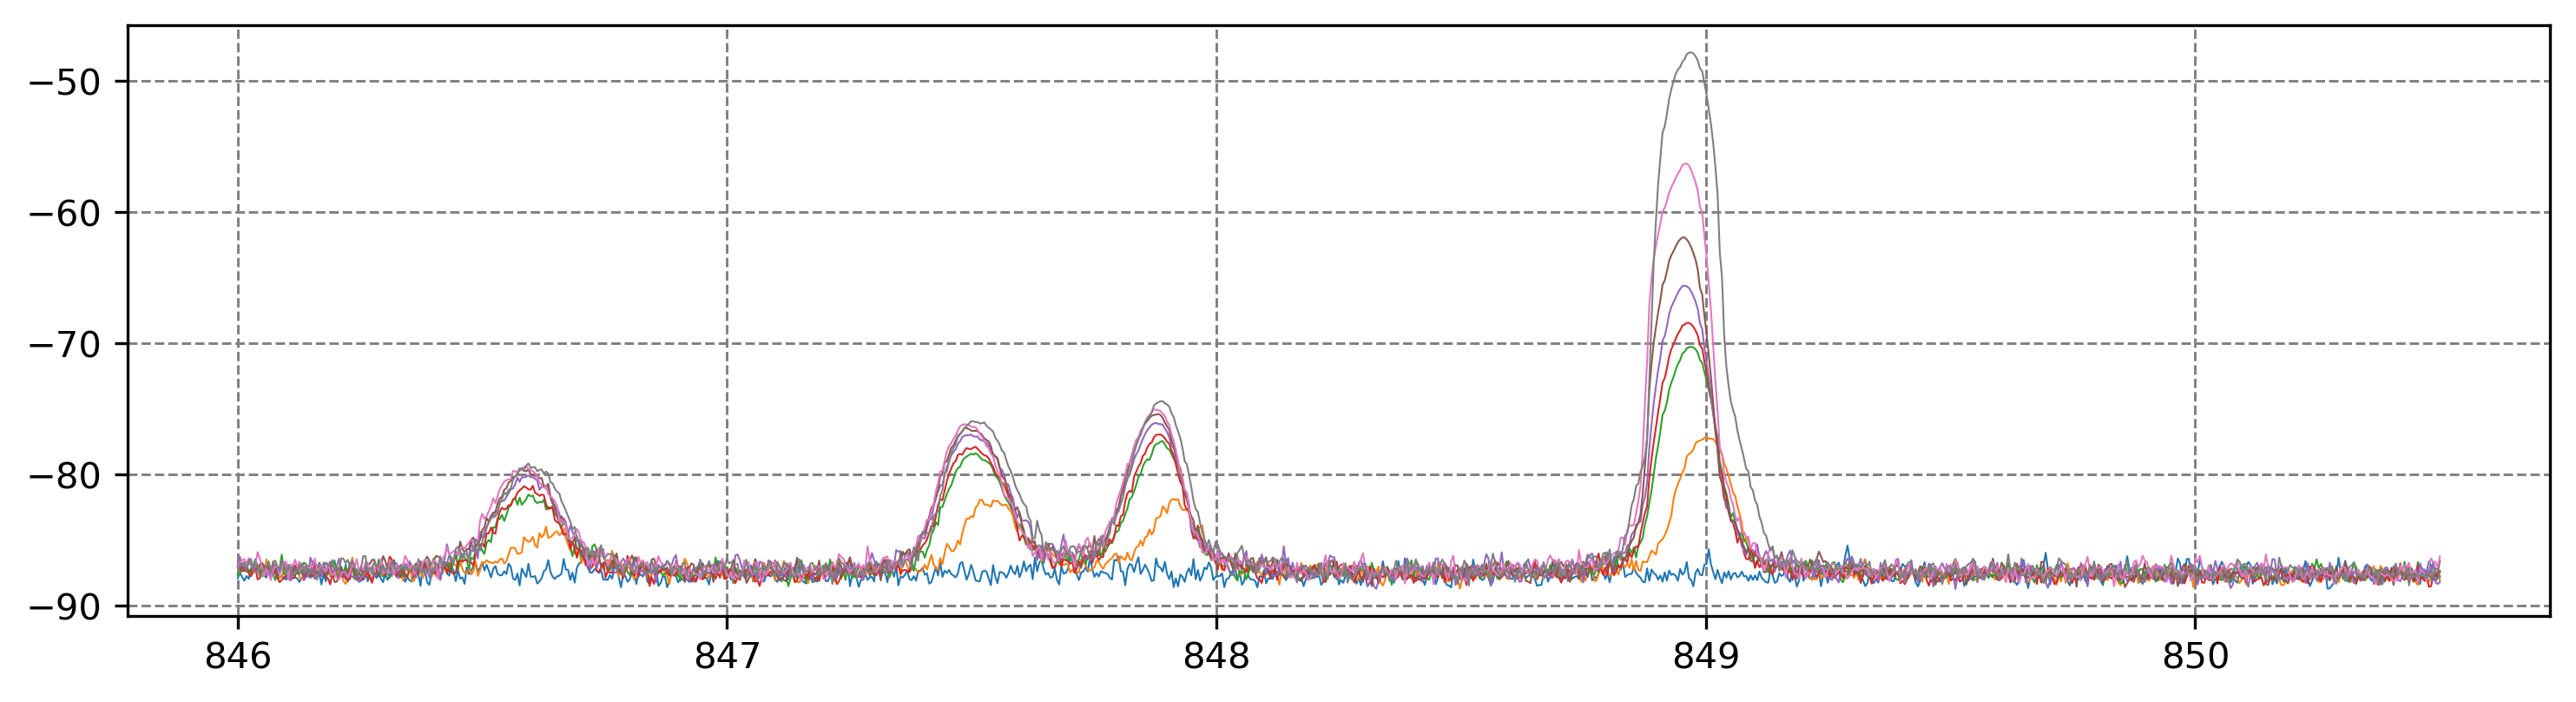

In [7]:
#wave, sig = ds5_report(1)
#plt.plot(wave,sig)

c = 0
plt.figure(figsize=(12,3),dpi=300)
for i in (ds5_files[1:17]):
    wave, sig = ds5_report(c)
    if (c % 2):
        plt.plot(wave,sig,'-',linewidth = 0.5)
        #legend = plt.legend(title="Current (mA)", handles=['0.1','0.25','0.35','0.37','0.39','0.41','0.5'])
        plt.grid(color = 'grey', linestyle = '--', linewidth = 0.7)
        #print(ds5_mA[c])
        #print(c)
        plt.savefig('OSA', dpi=300)
    c += 1

(847.0, 850.0)

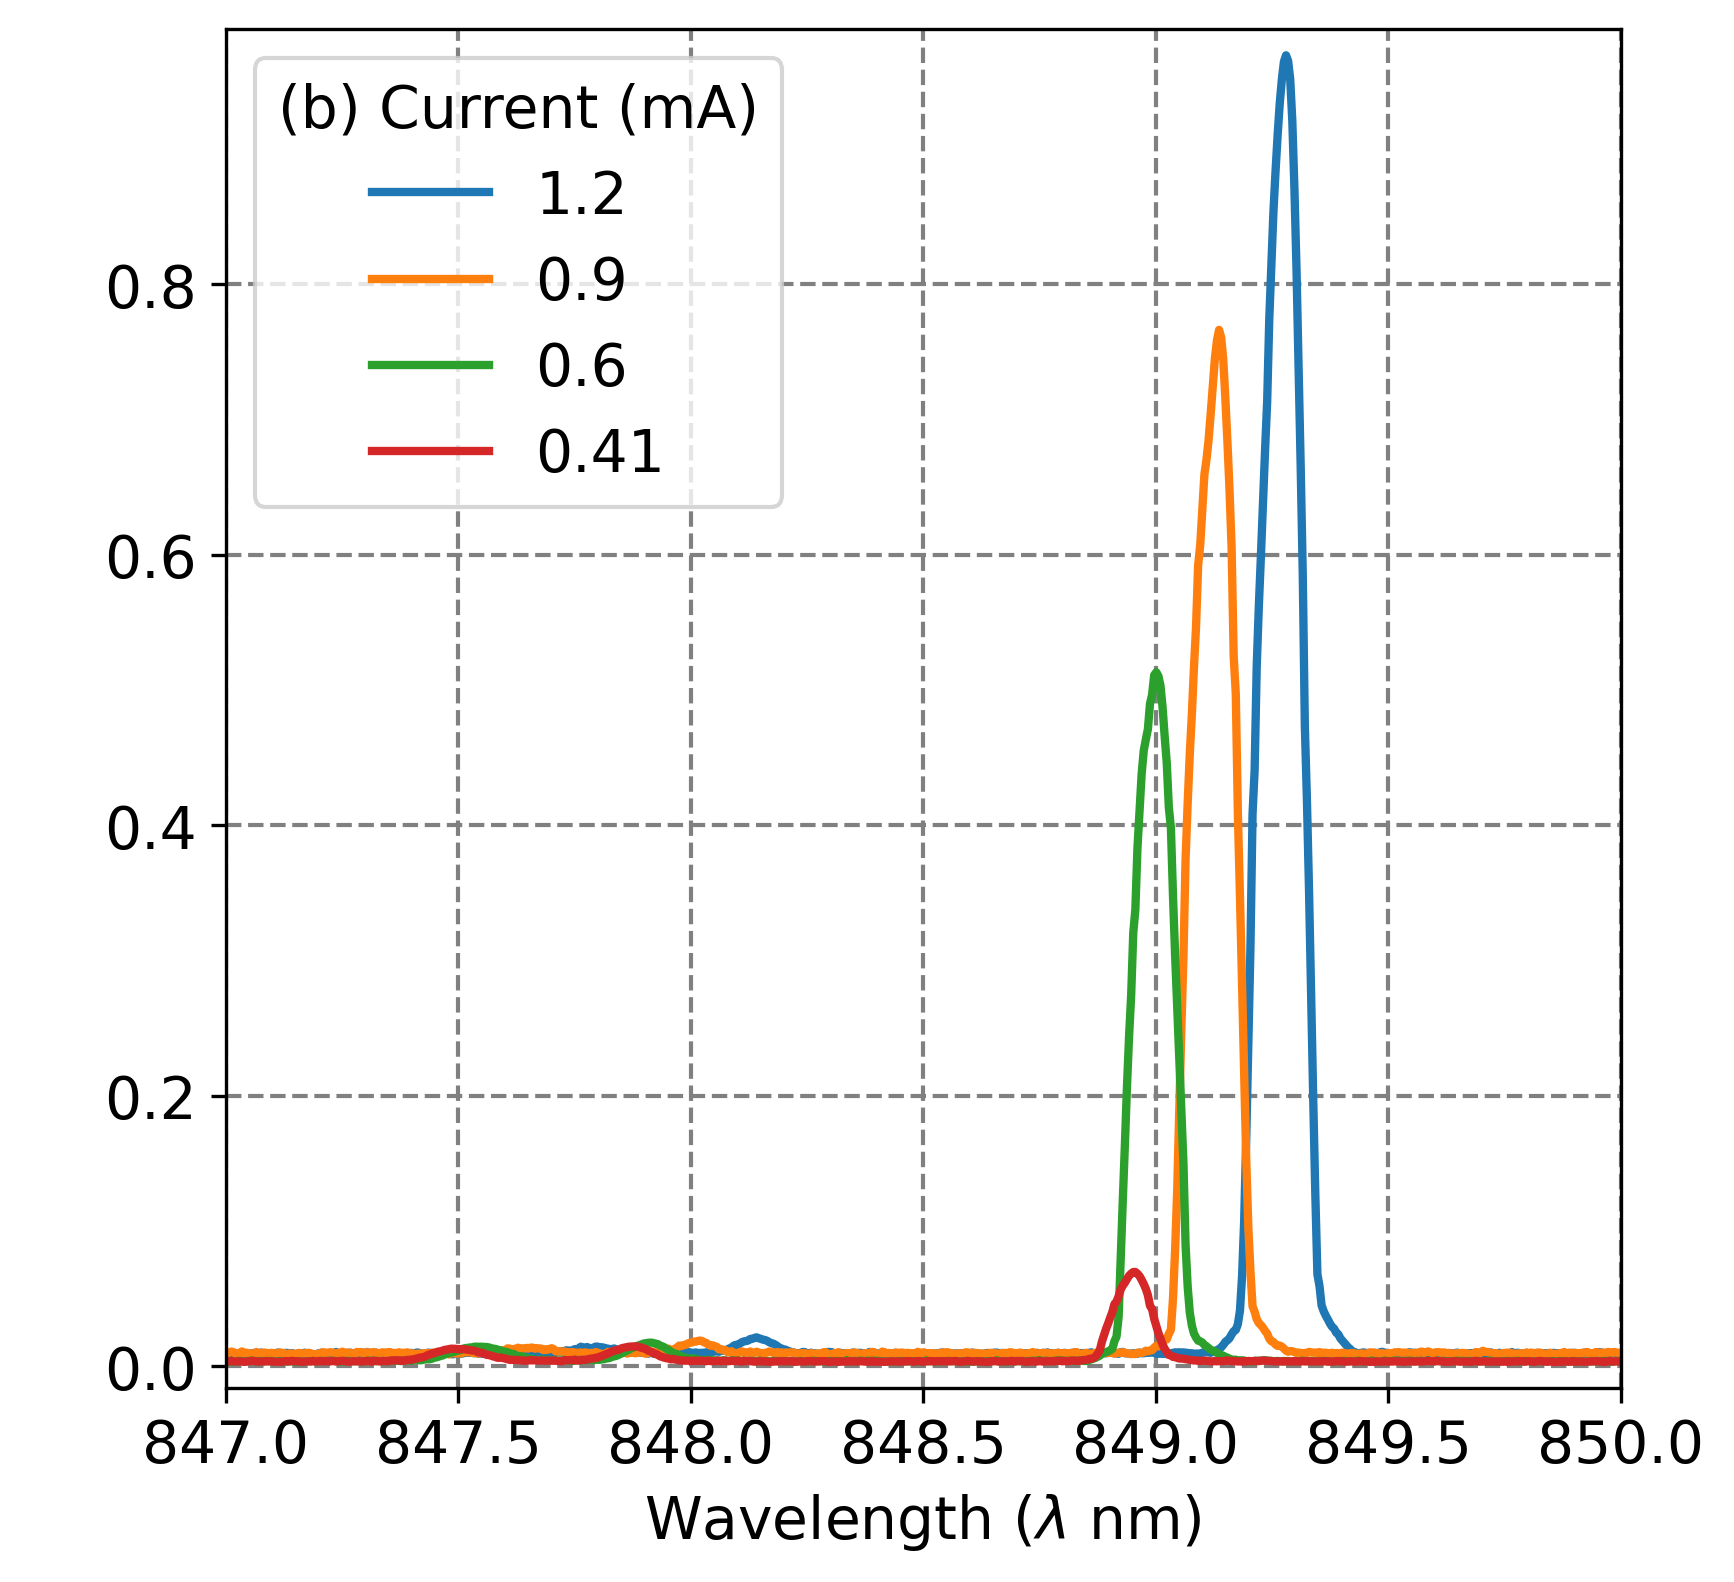

In [9]:
# red-shift
# log to linear scale

import seaborn as sns

plt.figure(figsize=(6,6),dpi=300)

#w_1, s_1 = ds5_report(1)
#plt.plot(w_1,s_1, label = 0.1, linewidth=0.75)
#w_4, s_4 = ds5_report(7)
#plt.plot(w_4,s_4, label = 0.37, linewidth=0.75)
#w_5, s_5 = ds5_report(11)
#plt.plot(w_5,s_5, label = 0.41, linewidth=0.75)
#w_6, s_6 = ds5_report(13)
#plt.plot(w_6,s_6, label = 0.5, linewidth=0.75)

x=2

def a_linear(a):
    return -np.average(a[0:50])*10**(a/20)


w_9, s_9 = ds5_report(22)
plt.plot(w_9,a_linear(s_9), label = 1.2, linewidth=x)

w_8, s_8 = ds5_report(19)
plt.plot(w_8,a_linear(s_8), label = 0.9, linewidth=x)

w_7, s_7 = ds5_report(16)
plt.plot(w_7,a_linear(s_7), label = 0.6, linewidth=x)

w_5, s_5 = ds5_report(11)
plt.plot(w_5,a_linear(s_5), label = 0.41, linewidth=x)


import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.margins(x=0.02, y=0.02)
plt.xlabel('Wavelength ($\lambda$ nm)')
plt.ylabel('Signal (mW)', color='white')
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.legend(title="(b) Current (mA)")
plt.xlim(847, 850)


(847.0, 850.0)

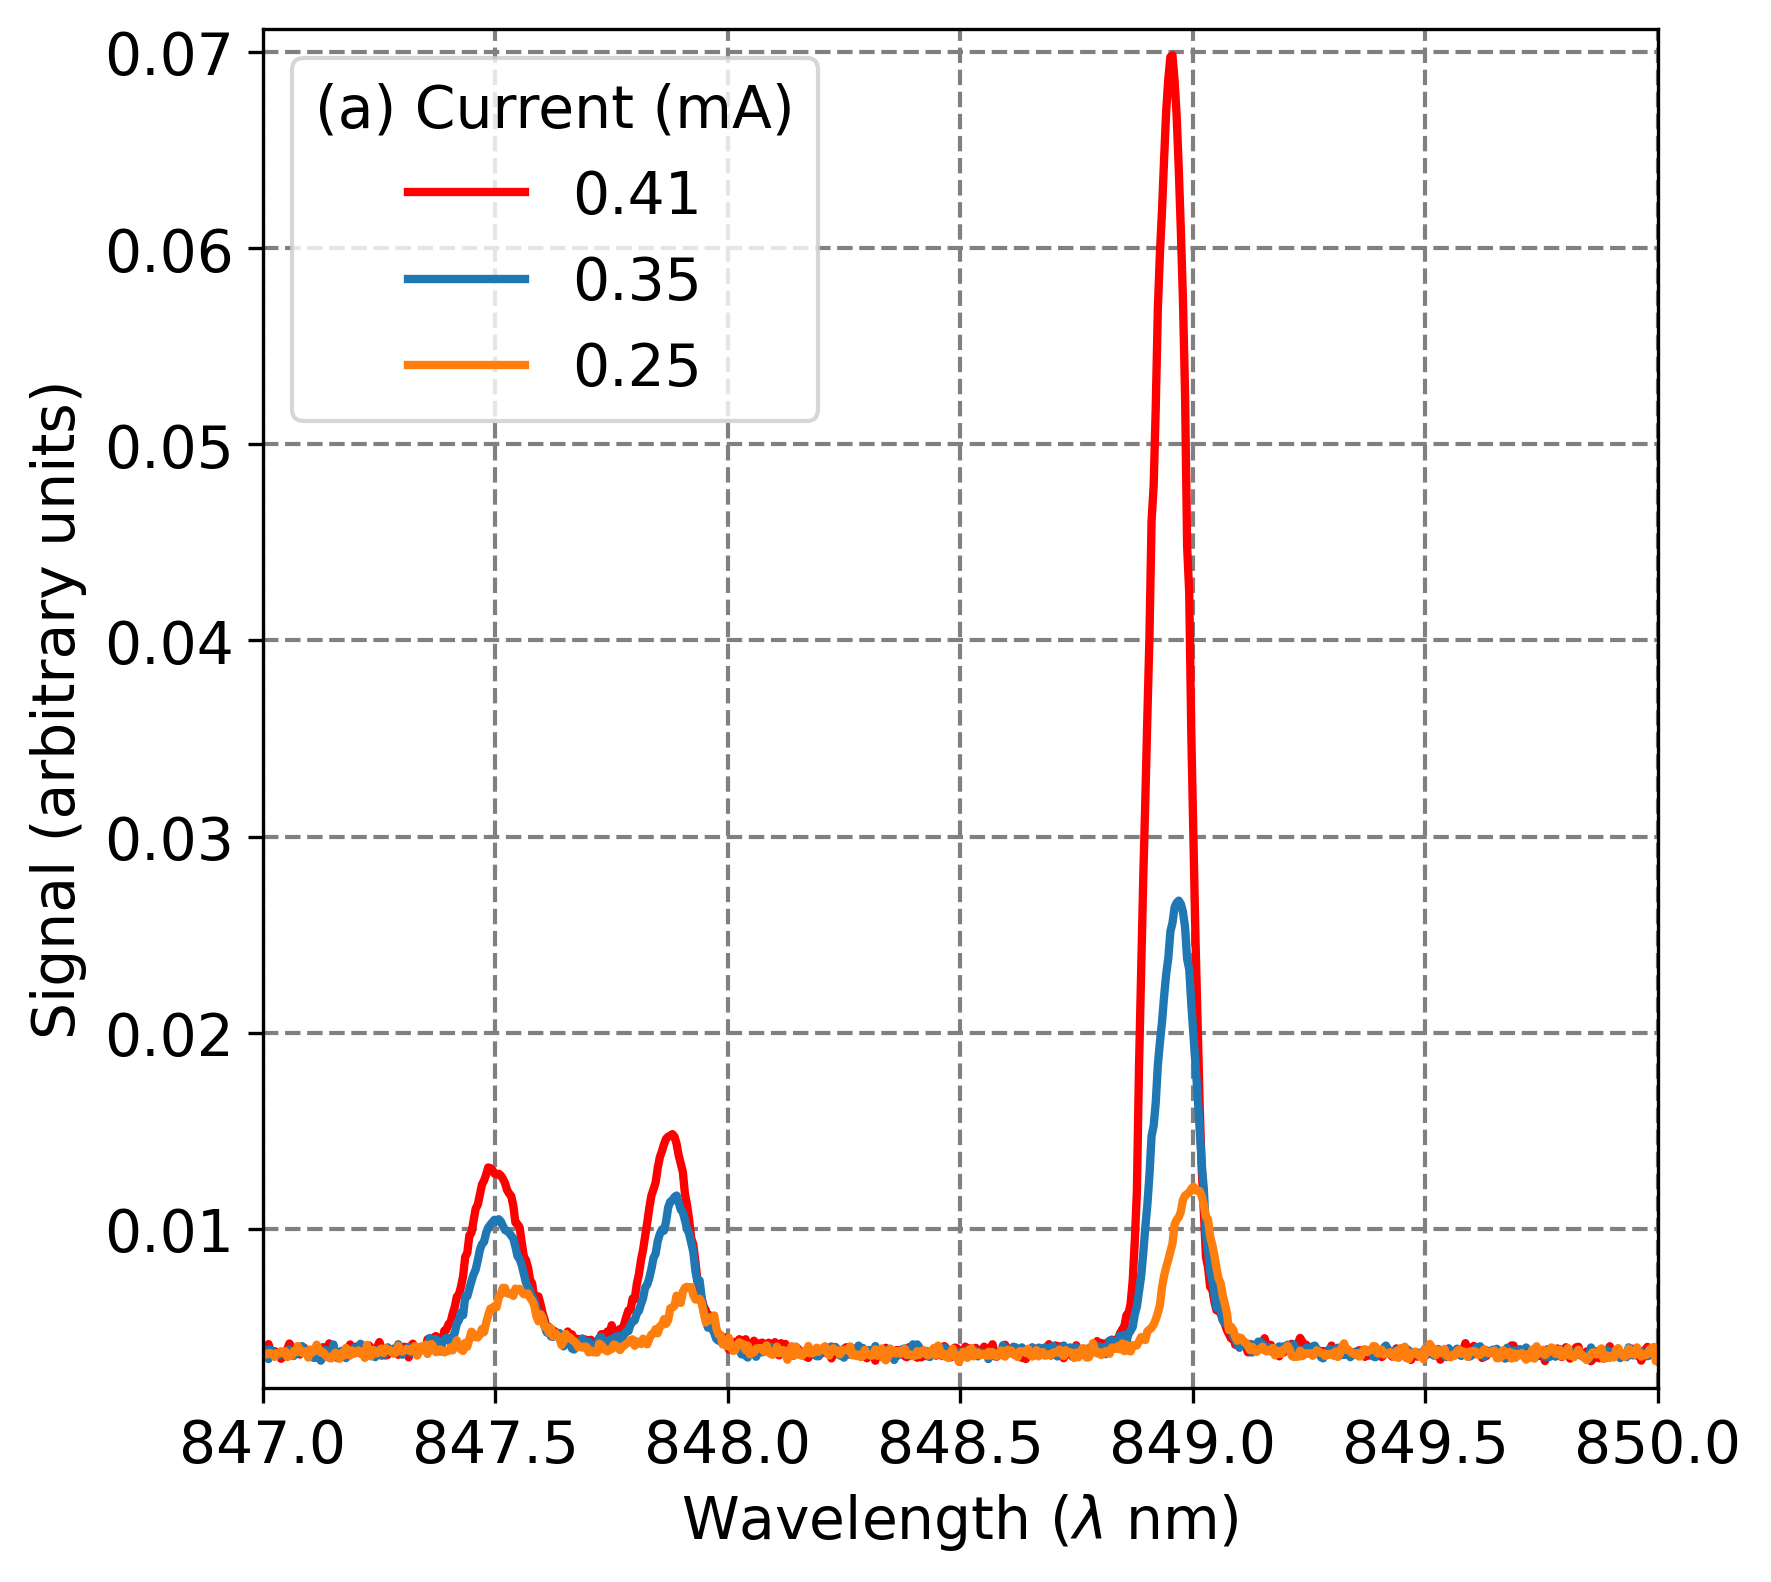

In [10]:
# blue-shift

import seaborn as sns

plt.figure(figsize=(6,6),dpi=300)

#w_1, s_1 = ds5_report(1)
#plt.plot(w_1,s_1, label = 0.1, linewidth=0.75)
#w_4, s_4 = ds5_report(7)
#plt.plot(w_4,s_4, label = 0.37, linewidth=0.75)
#w_5, s_5 = ds5_report(11)
#plt.plot(w_5,s_5, label = 0.41, linewidth=0.75)
#w_6, s_6 = ds5_report(13)
#plt.plot(w_6,s_6, label = 0.5, linewidth=0.75)

x=2

w_5, s_5 = ds5_report(11)
plt.plot(w_5,a_linear(s_5), 'r-',label = 0.41, linewidth=x)

w_3, s_3 = ds5_report(5)
plt.plot(w_3,a_linear(s_3), label = 0.35, linewidth=x)

w_2, s_2 = ds5_report(3)
plt.plot(w_2,a_linear(s_2), label = 0.25, linewidth=x)

#10**(s1/20)

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

plt.margins(x=0.02, y=0.02)
plt.xlabel('Wavelength ($\lambda$ nm)')
plt.ylabel('Signal (arbitrary units)')
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.legend(title="(a) Current (mA)", loc='upper left')

plt.xlim(847, 850)


0.41


(847.0, 850.0)

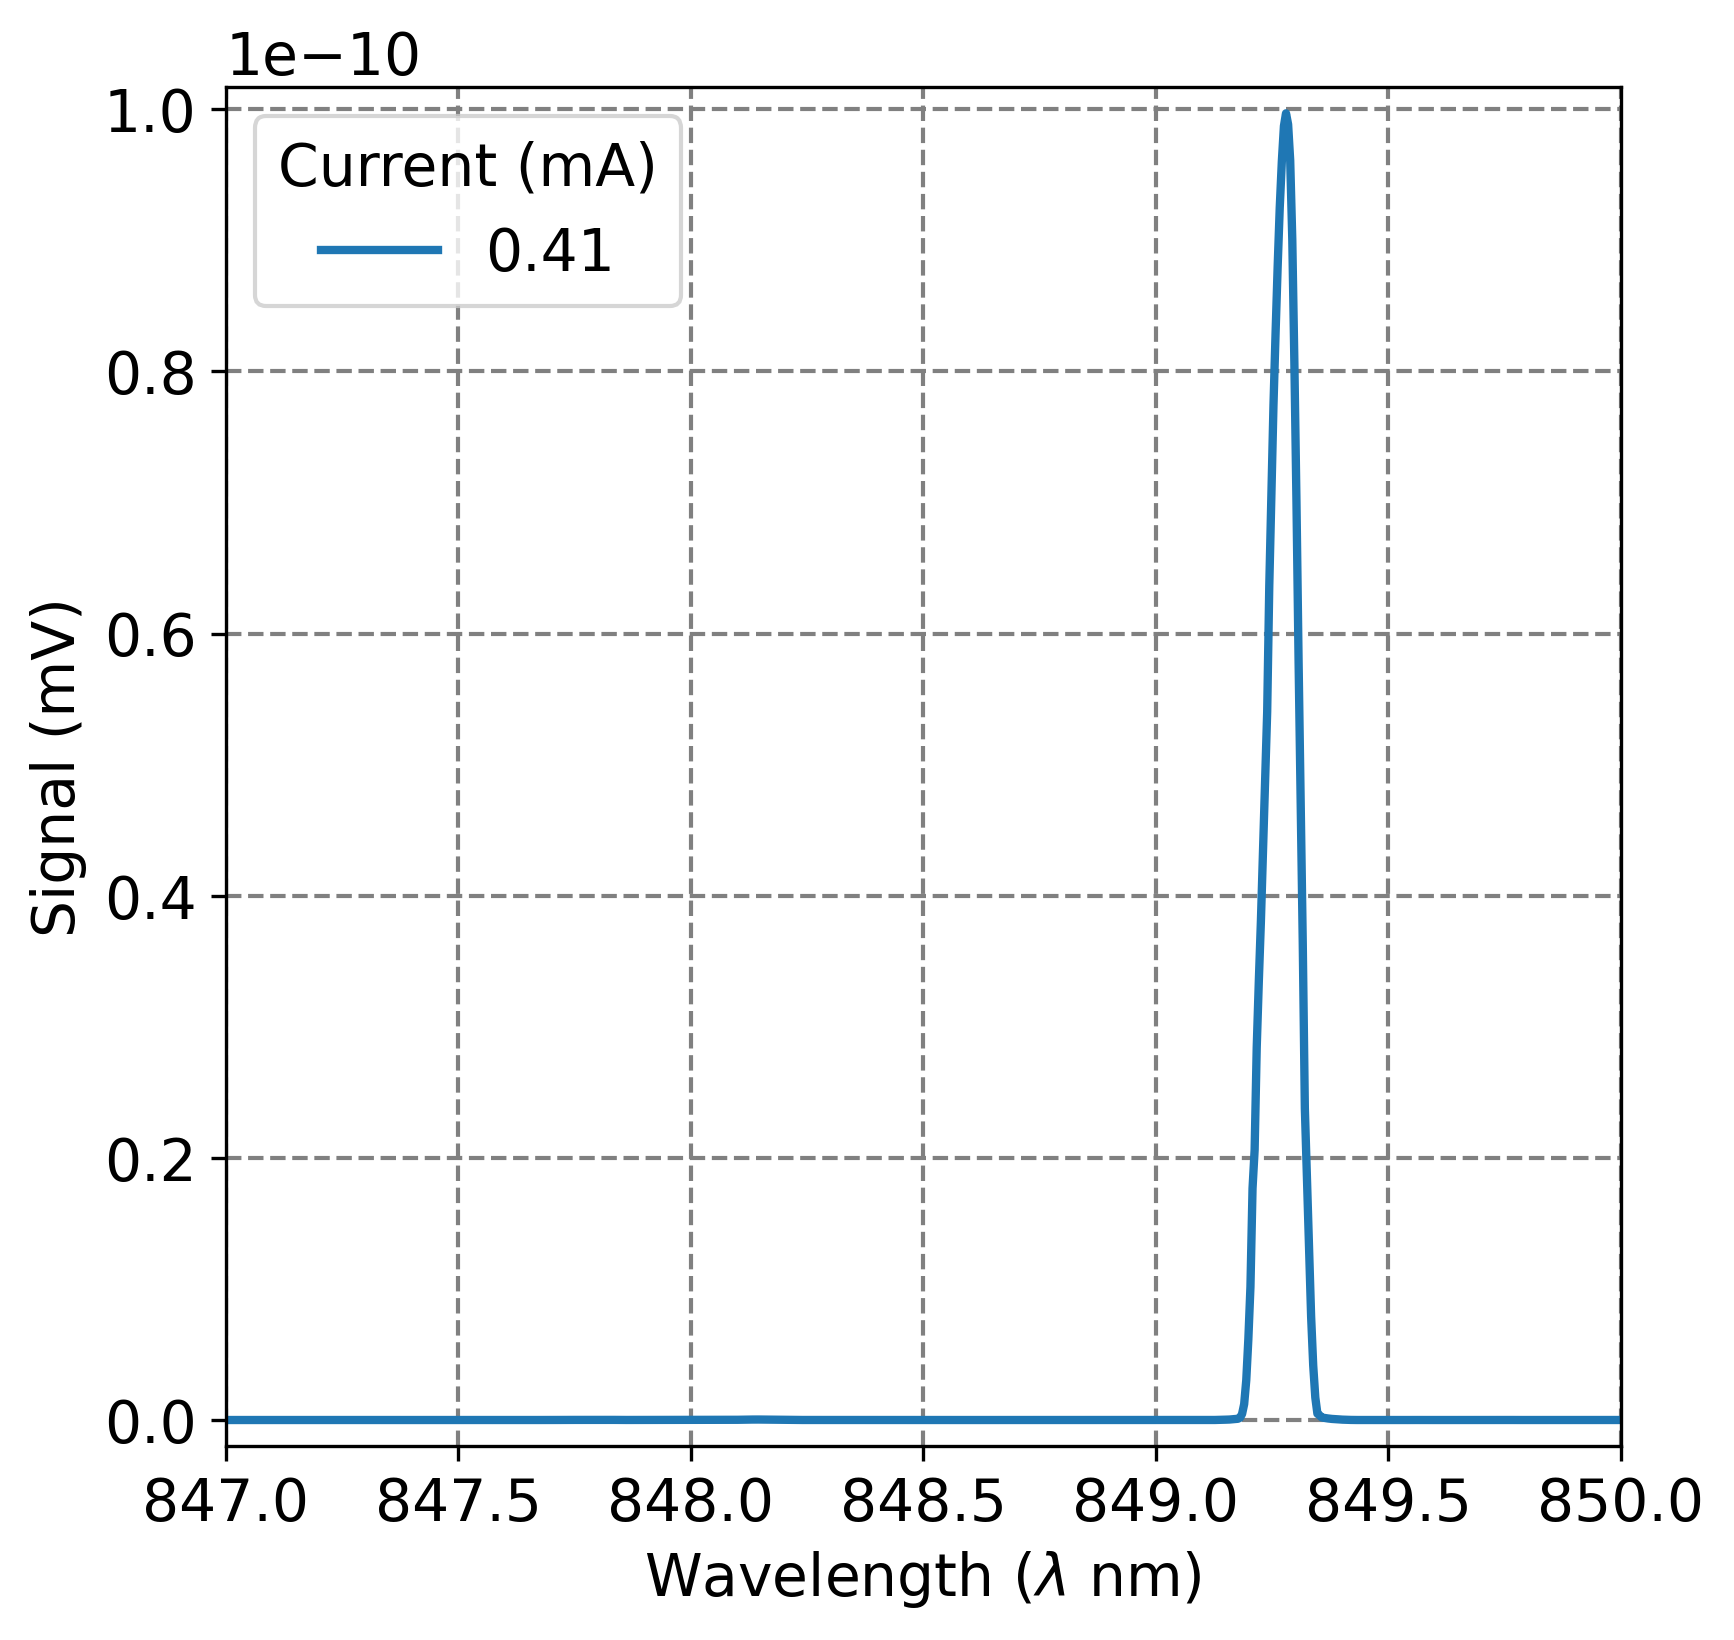

In [11]:

plt.figure(figsize=(6,6),dpi=300)

P_0 = max(10**(s_5/10))
#plt.plot(w_9,P_0*10**(s_9/10), label = 0.41, linewidth=x)
plt.plot(w_9,(P_0*10**(s_9/10)), label = 0.41, linewidth=x)
print(ds5_mA[11])

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.margins(x=0.02, y=0.02)
plt.xlabel('Wavelength ($\lambda$ nm)')
plt.ylabel('Signal (mV)')
plt.grid(color = 'grey', linestyle = '--', linewidth = 1)
plt.legend(title="Current (mA)", loc='upper left')
plt.xlim(847, 850)
#plt.savefig('4-r2-1', dpi=600)


In [ ]:
path = 'data-sets/data-set-5'
ds5_files = sorted(glob.glob(path+ '/*.txt'))
ds5_mA = np.array([0.0,0.1,0.2,0.25,0.3,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.8])

def ds5_visualiser(x):
    data_frame = pd.read_csv(ds5_files[x], sep='	', names= ['Wavelength (nm)','Signal (dB)'])
    #data_frame['Signal (dB)'] = 10*(np.log(data_frame['Signal (dB)'])) reference value ??
    #print(data_frame)
    data_frame.plot(kind='line', x='Wavelength (nm)', ylabel='Signal', figsize=(30,8), grid=True)
    current = ['Current (mA) = ', ds5_mA[x] ]
    return current

interact(ds5_visualiser, x= widgets.IntSlider(min= 0, max = 24, step =1, value=0))

interactive(children=(IntSlider(value=0, description='x', max=24), Output()), _dom_classes=('widget-interact',…

<function __main__.ds5_visualiser(x)>

In [ ]:
path_b = 'data-sets/data-set-6'
ds6_files = sorted(glob.glob(path_b+ '/*.DAT'))

print(ds6_files)

ds6_mA = np.array([0.0,0.4,0.45,1.0,1.8])

def ds6_visualiser(x):
    data_frame = pd.read_table(ds6_files[x])
    data_frame.plot(kind='line', x='Time_ms', y='C1 Voltage_mV', figsize=(30,8))
    current = ['Current (mA) = ', ds6_mA[x] ]
    return current

interact(ds6_visualiser, x= widgets.IntSlider(min= 0, max = 4, step =1, value=0))


['data-sets/data-set-6/msr0302220000.DAT', 'data-sets/data-set-6/msr0302220001.DAT', 'data-sets/data-set-6/msr0302220002.DAT', 'data-sets/data-set-6/msr0302220003.DAT', 'data-sets/data-set-6/msr0302220004.DAT', 'data-sets/data-set-6/msr0302220005.DAT']


interactive(children=(IntSlider(value=0, description='x', max=4), Output()), _dom_classes=('widget-interact',)…

<function __main__.ds6_visualiser(x)>